# Predicting Survival in the Titanic Data Set

#### We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not. You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger survived.

In [179]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Acquiring data

In [140]:
# data url 

url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)


In [141]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [142]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.

#### 38% survived the Titanic. Passenger age's range from 0.4 to 80. Some features, like ‘Age’  has missing values

In [143]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Looking at the data , we need to do 2 important steps:
      1) Converting categorical data to numeric
      2) Manage missing values
      

In [144]:
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

#### We don't need Cabin feature for prediction , so we can drop that column

In [145]:
titanic.drop(['Cabin'],axis=1 ,inplace=True)

In [146]:
titanic.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

#### Lets look at Age distribution

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

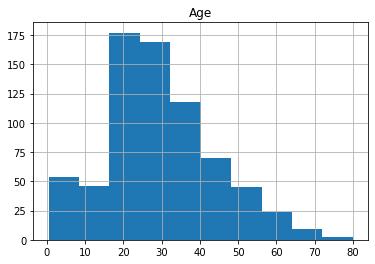

In [147]:
titanic.hist('Age')

Lets take the median value and assign for the missing ones



In [148]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)

In [149]:
titanic.isnull().sum().sort_values(ascending=False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

#### Let's look at Embarked distribution

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

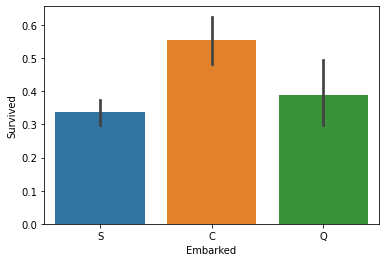

In [150]:
sns.barplot(x=titanic['Embarked'],y=titanic['Survived'])

#### Majority is 'C' class , So fill the Nan with 'C

In [151]:
titanic['Embarked'].fillna("C",inplace=True)

In [152]:
titanic.isnull().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

We need only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare for prediction

In [153]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [154]:
titanic.drop(['PassengerId','Name','Ticket'],axis = 1,inplace=True)

In [155]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [156]:
y = titanic['Survived']
X = titanic.drop(['Survived'],axis=1)



In [157]:
y.shape

(891,)

In [158]:
X.shape

(891, 7)

In [159]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [160]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


#### Lets encode Sex column with numeric values

In [161]:
lb = LabelEncoder()

In [162]:
X.Sex = lb.fit_transform(X.Sex)
X.Embarked = lb.fit_transform(X.Embarked)

In [163]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [164]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.531987
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.794531
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=13)

In [166]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [172]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [178]:
print("Training set:",clf.score(X_train,y_train))
print("Test set:",clf.score(X_test,y_test))
print("Cross validation score",cross_val_score(clf,X_train,y_train,cv=5).mean())

Training set: 0.985553772070626
Test set: 0.7761194029850746
Cross validation score 0.7864774193548387


Lets tune the hyperparameters using GridSearchCV and try reduce overfitting

In [186]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,2),
    'min_samples_leaf' : range(1,15,2),
    'min_samples_split': range(2,10,2),
    'splitter' : ['best', 'random']
    
}

In [188]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [190]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'min_samples_leaf': range(1, 15, 2),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ['best', 'random']})

In [191]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [201]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf= 1,min_samples_split=12,splitter= 'best')

In [202]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=12)

In [203]:
cross_val_score(clf,X_train,y_train,cv=5).mean()

0.8410709677419355

In [204]:
#Test score after tuning the hyperparameters
clf.score(X_test,y_test)

0.8134328358208955